| |<font size="5">Feature Selection  اختيار افضل الخصائص المؤثرة </font>|
|-:|-:|
|<img src="https://miro.medium.com/max/594/1*nyC9bOwnK16Cl8jFYTyEFQ.png" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>|
||<font size="4">في تعويض القيم الناقصة SimpleImputer  توظيف خوارزمية </font>|
||<font size="4">في اختيار أفضل الخصائص المؤثرة Lasso  توظيف خوارزمية </font>|
||<font size="4"> التخطيط البياني لأفضل الخصائص التي تم الأحتفاظ بها </font>|
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|


https://youtu.be/T4nZDuakYlU?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq

https://youtu.be/xlHk4okO8Ls

https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection/blob/master/4.5_Demo_Feature_Selection_Hybrid_method.ipynb



In [8]:
#تحميل البيانات
import pandas as pd
df= pd.read_csv("../data/HousePrice_4.csv", index_col=0)

In [9]:
df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
1335,20,RL,80.0,9650,Pave,3,Lvl,AllPub,Inside,2,...,Normal,167900,2684,16,2.5,8.660254e-01,-0.500000,0,32,0
676,70,RM,60.0,9600,Pave,3,Lvl,AllPub,Inside,2,...,Normal,87000,2869,90,3.0,5.000000e-01,-0.866025,1,56,0
306,60,RL,116.0,13474,Pave,3,Lvl,AllPub,Inside,2,...,Normal,225000,2943,268,3.5,1.224647e-16,-1.000000,1,16,0


## Conduct Recursive Feature Elimination

In [10]:
df.select_dtypes("number").head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,...,MiscVal,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
0,60,65.0,8450,3,2,7,5,2.0,196.0,2,...,0,208500,2566,61,3.5,8.660254e-01,5.000000e-01,0,5,0
1,20,80.0,9600,3,2,6,8,0.0,0.0,1,...,0,181500,2524,0,2.5,5.000000e-01,-8.660254e-01,0,31,0
2,60,68.0,11250,2,2,7,5,2.0,162.0,2,...,0,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16,1,6,0
3,70,60.0,9550,2,2,7,5,0.0,0.0,1,...,0,140000,2473,307,2.0,8.660254e-01,5.000000e-01,1,36,0
4,60,84.0,14260,2,2,8,5,2.0,350.0,2,...,0,250000,3343,84,3.5,-2.449294e-16,1.000000e+00,0,8,0


In [11]:
df.isna().sum()/df.shape[0]

MSSubClass     0.00000
MSZoning       0.00000
LotFrontage    0.17732
LotArea        0.00000
Street         0.00000
                ...   
SnMoSold       0.00000
CsMoSold       0.00000
Remodeled      0.00000
Age            0.00000
Isnew          0.00000
Length: 67, dtype: float64

In [12]:
# تحديد الخصائص والهدف
X, y = df.select_dtypes("number").drop("SalePrice", axis=1), df.SalePrice

In [13]:
from sklearn.linear_model import   LassoCV
reg = LassoCV( )
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ضرورة التأكد من غياب بعض القيم
(X.isnull().sum()/X.shape[0]).sort_values(ascending=False)

LotFrontage     0.177320
GarageCond      0.055670
GarageFinish    0.055670
GarageQual      0.055670
BsmtFinType2    0.026117
BsmtExposure    0.026117
BsmtQual        0.025430
BsmtFinType1    0.025430
BsmtCond        0.025430
MasVnrType      0.005498
MasVnrArea      0.005498
BsmtUnfSF       0.000000
BsmtFinSF2      0.000000
BsmtFinSF1      0.000000
Isnew           0.000000
CentralAir      0.000000
ExterCond       0.000000
ExterQual       0.000000
OverallCond     0.000000
OverallQual     0.000000
LandSlope       0.000000
LotShape        0.000000
LotArea         0.000000
HeatingQC       0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
WoodDeckSF      0.000000
Remodeled       0.000000
CsMoSold        0.000000
SnMoSold        0.000000
TotalBath       0.000000
TotalPorchSF    0.000000
TotalSF         0.000000
MiscVal         0.000000
PoolArea        0.000000
PavedDrive      0.000000
Age             0.000000
GarageArea      0.000000
Fireplaces      0.000000
Functional      0.000000


In [ ]:
X[ X.isna().any(1)].head()


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
7,60,NaN,10382,2,2,7,6,3.0,240.0,1,2,2.0,2.0,1.0,4.0,859,3.0,32,216,4,1,1107,983,0,3,1,1,7,1,2,1.0,484,2.0,2.0,2,235,0,350,3197,432,3.5,-0.500000,8.660254e-01,0,36,0
12,20,NaN,12968,1,2,5,6,0.0,0.0,1,2,1.0,2.0,0.0,4.0,737,1.0,0,175,2,1,912,0,0,2,1,1,4,1,0,0.0,352,2.0,2.0,2,140,0,0,1824,176,2.0,-1.000000,-1.836970e-16,0,46,0
14,20,NaN,10920,2,2,6,5,2.0,212.0,1,2,1.0,2.0,0.0,3.0,733,1.0,0,520,2,1,1253,0,0,2,1,1,5,1,1,1.0,352,2.0,2.0,2,0,0,0,2506,389,2.5,0.500000,-8.660254e-01,0,48,0
16,20,NaN,11241,2,2,6,7,2.0,180.0,1,2,1.0,2.0,0.0,4.0,578,1.0,0,426,4,1,1004,0,0,2,1,1,5,1,1,2.0,480,2.0,2.0,2,0,0,700,2008,0,2.0,1.000000,6.123234e-17,0,40,0
17,90,72.0,10791,3,2,4,5,0.0,0.0,1,2,NaN,NaN,NaN,NaN,0,NaN,0,0,2,1,1296,0,0,2,2,1,6,1,0,0.0,516,2.0,2.0,2,0,0,500,1296,0,2.0,-0.866025,5.000000e-01,0,39,0


## Imputation   تعويض القيم الناقصة

In [ ]:
! pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 3.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Features  Selection

In [ ]:
from sklearn.impute import SimpleImputer

imput= SimpleImputer(strategy="mean")
# X[ ["LotFrontage","MasVnrArea"]]= imput.fit_transform(X[["LotFrontage","MasVnrArea"]])
imput.fit_transform(X )[1]

array([ 2.00000000e+01,  8.00000000e+01,  9.60000000e+03,  3.00000000e+00,
        2.00000000e+00,  6.00000000e+00,  8.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  4.00000000e+00,  9.78000000e+02,
        1.00000000e+00,  0.00000000e+00,  2.84000000e+02,  4.00000000e+00,
        1.00000000e+00,  1.26200000e+03,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  1.00000000e+00,  1.00000000e+00,  6.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.60000000e+02,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  2.98000000e+02,
        0.00000000e+00,  0.00000000e+00,  2.52400000e+03,  0.00000000e+00,
        2.50000000e+00,  5.00000000e-01, -8.66025404e-01,  0.00000000e+00,
        3.10000000e+01,  0.00000000e+00])

In [ ]:
X = pd.DataFrame(imput.fit_transform(X ),columns= X.columns )

In [ ]:
X.sample(3)

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
897,20.0,65.0,6993.0,3.0,2.0,5.0,7.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,3.0,465.0,1.0,0.0,447.0,2.0,1.0,1236.0,0.0,0.0,3.0,1.0,1.0,6.0,1.0,1.0,0.000000,288.0,2.000000,2.000000,2.0,0.0,0.0,0.0,2148.0,0.0,1.0,1.224647e-16,-1.000000,1.0,12.0,0.0
1122,20.0,60.0,10434.0,3.0,2.0,4.0,5.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1005.0,2.0,1.0,1005.0,0.0,0.0,2.0,1.0,0.0,5.0,1.0,1.0,0.000000,672.0,1.000000,1.000000,2.0,0.0,0.0,0.0,2010.0,0.0,1.0,-5.000000e-01,0.866025,0.0,54.0,0.0
78,90.0,72.0,10778.0,3.0,2.0,4.0,5.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1768.0,2.0,0.0,1768.0,0.0,0.0,4.0,2.0,1.0,8.0,1.0,0.0,0.813683,0.0,1.975255,1.973799,2.0,0.0,0.0,0.0,3536.0,0.0,2.0,8.660254e-01,-0.500000,0.0,42.0,0.0


In [ ]:
X[ X.isna().any(1)].head()


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew


In [ ]:
from sklearn.linear_model import   LassoCV
reg = LassoCV( )
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 210546.430256
Best score using built-in LassoCV: 0.763620


In [ ]:
coef

MSSubClass       -0.000000
LotFrontage       0.000000
LotArea           0.341019
LotShape         -0.000000
LandSlope         0.000000
OverallQual       0.000000
OverallCond       0.000000
MasVnrType        0.000000
MasVnrArea       38.271157
ExterQual         0.000000
ExterCond        -0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1       21.288400
BsmtFinType2      0.000000
BsmtFinSF2       -2.320633
BsmtUnfSF        -0.000000
HeatingQC         0.000000
CentralAir        0.000000
1stFlrSF          0.000000
2ndFlrSF         14.605993
LowQualFinSF     -0.000000
BedroomAbvGr     -0.000000
KitchenAbvGr     -0.000000
KitchenQual       0.000000
TotRmsAbvGrd     -0.000000
Functional       -0.000000
Fireplaces        0.000000
GarageFinish      0.000000
GarageArea       78.961598
GarageQual        0.000000
GarageCond        0.000000
PavedDrive        0.000000
WoodDeckSF       23.401461
PoolArea          0.000000
M

In [ ]:
import numpy as np
coef[np.abs(coef)>0]

LotArea         0.341019
MasVnrArea     38.271157
BsmtFinSF1     21.288400
BsmtFinSF2     -2.320633
2ndFlrSF       14.605993
GarageArea     78.961598
WoodDeckSF     23.401461
MiscVal        -0.510385
TotalSF        55.129448
Age          -239.811418
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 36 variables


In [ ]:
# فرز الخصائص حسب الأهمية
import  numpy as np
coef[np.abs(coef)>0].sort_values(ascending=False)

GarageArea     78.961598
TotalSF        55.129448
MasVnrArea     38.271157
WoodDeckSF     23.401461
BsmtFinSF1     21.288400
2ndFlrSF       14.605993
LotArea         0.341019
MiscVal        -0.510385
BsmtFinSF2     -2.320633
Age          -239.811418
dtype: float64

In [ ]:
np.abs(coef).nlargest(10)

Age           239.811418
GarageArea     78.961598
TotalSF        55.129448
MasVnrArea     38.271157
WoodDeckSF     23.401461
BsmtFinSF1     21.288400
2ndFlrSF       14.605993
BsmtFinSF2      2.320633
MiscVal         0.510385
LotArea         0.341019
dtype: float64

In [ ]:
# قائمة الخصائص الأكثر أهمية
features_kept=np.abs(coef).nlargest(10).index
features_kept

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF',
       'BsmtFinSF1', '2ndFlrSF', 'BsmtFinSF2', 'MiscVal', 'LotArea'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

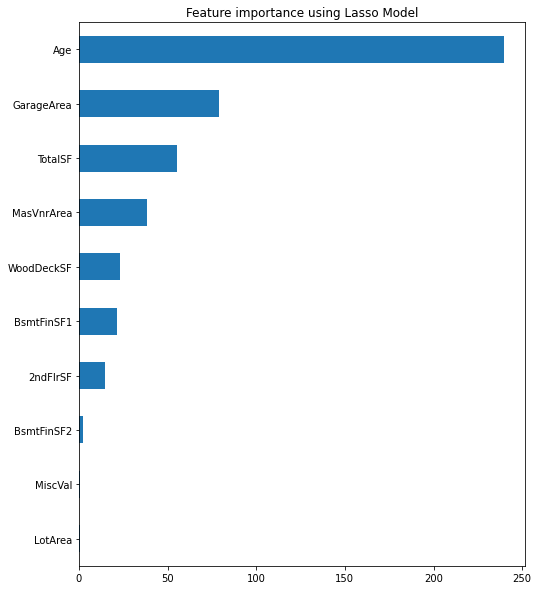

In [ ]:
# التخطيط البياني لأهم الخصائص
import matplotlib.pyplot as plt

imp_coef = np.abs(coef).nlargest(10).sort_values()
import matplotlib
plt.figure(figsize=(8.0, 10.0))
imp_coef.plot(kind = "barh")
#  np.log1p(imp_coef)
plt.title("Feature importance using Lasso Model")

In [ ]:
# اظهار البيانات
X[features_kept].head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea
0,5.0,548.0,2566.0,196.0,0.0,706.0,854.0,0.0,0.0,8450.0
1,31.0,460.0,2524.0,0.0,298.0,978.0,0.0,0.0,0.0,9600.0
2,6.0,608.0,2706.0,162.0,0.0,486.0,866.0,0.0,0.0,11250.0
3,36.0,642.0,2473.0,0.0,0.0,216.0,756.0,0.0,0.0,9550.0
4,8.0,836.0,3343.0,350.0,192.0,655.0,1053.0,0.0,0.0,14260.0


In [ ]:
# اضافة عمود الهدف
df_select= pd.concat([X[features_kept], y], axis=1)
df_select.sample(3)

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
1351,42.0,264.0,1756.0,65.0,0.0,340.0,0.0,0.0,0.0,9477.0,171000.0
90,56.0,420.0,1040.0,0.0,0.0,0.0,0.0,0.0,0.0,7200.0,109900.0
346,9.0,301.0,1916.0,0.0,0.0,498.0,0.0,0.0,15500.0,12772.0,151500.0


In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
# حفظ البيانات
df_select.to_csv("./data/features_kept1.csv")

In [ ]:
",".join(df_select.columns)

'Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice'

In [ ]:
# حفظ الخصائص التي تم تحديدها
with open("./data/features_selected.txt", "w") as f :
  f.write(",".join(df_select.columns))


In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
# التأكد من حفظ الملف

open("./data/features_selected.txt" , "r").read()


'Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice'

In [ ]:
# تحميل الخصائص على شكل مصفوفة
fl=open("./data/features_selected.txt" , "r").read().split(",")
fl

['Age',
 'GarageArea',
 'TotalSF',
 'MasVnrArea',
 'WoodDeckSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 'BsmtFinSF2',
 'MiscVal',
 'LotArea',
 'SalePrice']

In [ ]:
# اظهار البيانات التي تم احتيارها فقط
df[fl]

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
0,5,548,2566,196.0,0,706,854,0,0,8450,208500
1,31,460,2524,0.0,298,978,0,0,0,9600,181500
2,6,608,2706,162.0,0,486,866,0,0,11250,223500
3,36,642,2473,0.0,0,216,756,0,0,9550,140000
4,8,836,3343,350.0,192,655,1053,0,0,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7,460,2600,0.0,0,0,694,0,0,7917,175000
1456,22,500,3615,119.0,349,790,0,163,0,13175,210000
1457,4,252,3492,0.0,0,275,1152,0,2500,9042,266500
1458,14,240,2156,0.0,366,49,0,1029,0,9717,142125


In [ ]:
df= pd.read_csv("./data/HousePrice_4.csv",usecols=fl ) #index_col=0)
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,GarageArea,WoodDeckSF,MiscVal,SalePrice,TotalSF,Age
0,8450,196.0,706,0,854,548,0,0,208500,2566,5
1,9600,0.0,978,0,0,460,298,0,181500,2524,31
2,11250,162.0,486,0,866,608,0,0,223500,2706,6
3,9550,0.0,216,0,756,642,0,0,140000,2473,36
4,14260,350.0,655,0,1053,836,192,0,250000,3343,8




---



---



In [ ]:
# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X[features_kept], y  ,test_size=.33, random_state=42)

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)

In [ ]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

In [ ]:

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)

In [ ]:
# write dataframe to a csv file
